In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
station = base.classes.station
measure = base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measure.date).order_by(measure.date.desc()).first()

('2017-08-23',)

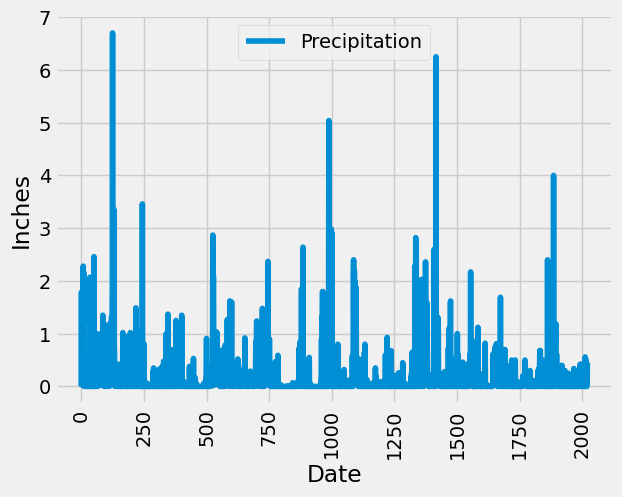

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23)-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
scores = session.query(measure.date, measure.prcp).\
filter(measure.date>=query_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(scores, columns =["Date", "Precipitation"])

# Sort the dataframe by date
df_sorted = df.sort_values("Date")
df_sorted = df_sorted.dropna()
df_sorted = df_sorted.reset_index(drop=True)

# Use Pandas Plotting with Matplotlib to plot the data
df_sorted.plot(rot = 90)
plt.ylabel('Inches')
plt.xlabel('Date')
plt.show()

In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_sorted.describe()


,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_rows = session.query(measure.station, func.count(measure.station)).\
group_by(measure.station).\
order_by(func.count(measure.station).desc()).all()
station_rows

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps = session.query(func.min(measure.tobs),
                      func.max(measure.tobs), 
                      func.avg(measure.tobs)).\
    group_by(measure.station).filter(measure.station == 'USC00519281').all()
temps

[(54.0, 85.0, 71.66378066378067)]

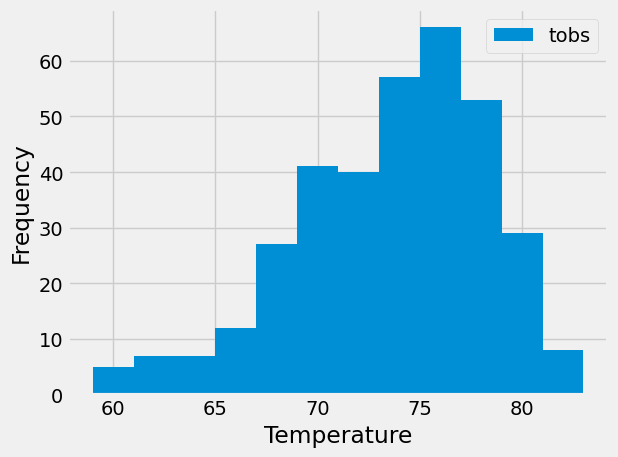

In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station = session.query(measure.tobs).\
    filter(measure.station == 'USC00519281').\
    filter(measure.date >= query_date).all()
    
temps_df = pd.DataFrame(active_station, columns=["tobs"])

temps_df.plot.hist(bins = 12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.tight_layout()

# Close Session

In [16]:
# Close Session
session.close()